In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("accident_dataset.csv")
df.head()

,Accident_ID,Date,Time,Location,Accident_Type,Weather,Road_Condition,Casualties,Severity
0,A001,2025-01-05,08:30,Mumbai,Car,Clear,Dry,2,Medium
1,A002,2025-01-06,14:15,Delhi,Bike,Rainy,Wet,1,Low
2,A003,2025-01-07,19:45,Pune,Truck,Foggy,Wet,3,High
3,A004,2025-01-08,10:20,Bangalore,Car,Clear,Dry,0,Low
4,A005,2025-01-09,22:10,Hyderabad,Bike,Rainy,Wet,2,Medium


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Accident_ID     10 non-null     object
 1   Date            10 non-null     object
 2   Time            10 non-null     object
 3   Location        10 non-null     object
 4   Accident_Type   10 non-null     object
 5   Weather         10 non-null     object
 6   Road_Condition  10 non-null     object
 7   Casualties      10 non-null     int64 
 8   Severity        10 non-null     object
dtypes: int64(1), object(8)
memory usage: 852.0+ bytes


,Casualties
count,10.000000
mean,2.100000
std,1.523884
min,0.000000
25%,1.000000
50%,2.000000
75%,2.750000
max,5.000000


In [4]:
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M")

def time_of_day(time):
    hour = time.hour
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df["Time_of_Day"] = df["Time"].apply(time_of_day)
df[["Time", "Time_of_Day"]]

,Time,Time_of_Day
0,1900-01-01 08:30:00,Morning
1,1900-01-01 14:15:00,Afternoon
2,1900-01-01 19:45:00,Evening
3,1900-01-01 10:20:00,Morning
4,1900-01-01 22:10:00,Night
5,1900-01-01 16:40:00,Afternoon
6,1900-01-01 07:50:00,Morning
7,1900-01-01 18:30:00,Evening
8,1900-01-01 12:05:00,Afternoon
9,1900-01-01 21:55:00,Night


In [5]:
weather_count = df["Weather"].value_counts()
weather_count

Weather
Clear    5
Rainy    3
Foggy    2
Name: count, dtype: int64

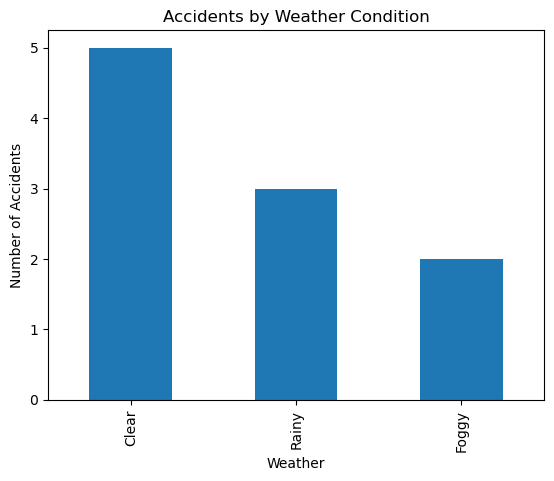

In [6]:
plt.figure()
weather_count.plot(kind="bar")
plt.title("Accidents by Weather Condition")
plt.xlabel("Weather")
plt.ylabel("Number of Accidents")
plt.show()

In [7]:
road_count = df["Road_Condition"].value_counts()
road_count

Road_Condition
Dry    5
Wet    5
Name: count, dtype: int64

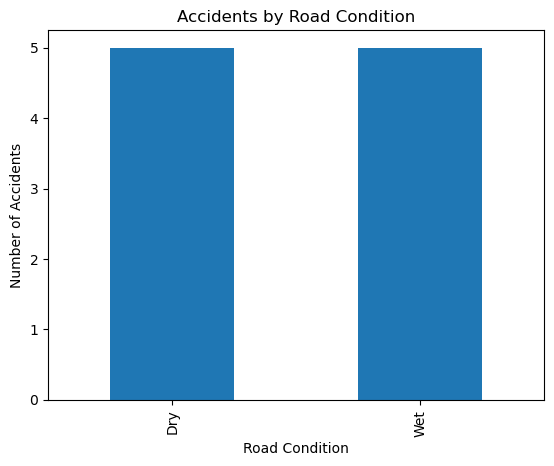

In [8]:
plt.figure()
road_count.plot(kind="bar")
plt.title("Accidents by Road Condition")
plt.xlabel("Road Condition")
plt.ylabel("Number of Accidents")
plt.show()

In [9]:
time_count = df["Time_of_Day"].value_counts()
time_count

Time_of_Day
Morning      3
Afternoon    3
Evening      2
Night        2
Name: count, dtype: int64

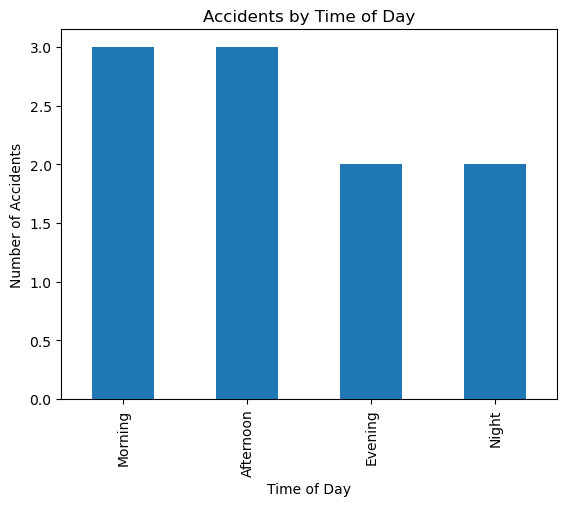

In [10]:
plt.figure()
time_count.plot(kind="bar")
plt.title("Accidents by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.show()

In [11]:
location_count = df["Location"].value_counts()
location_count

Location
Mumbai       1
Delhi        1
Pune         1
Bangalore    1
Hyderabad    1
Chennai      1
Nagpur       1
Kolkata      1
Ahmedabad    1
Jaipur       1
Name: count, dtype: int64

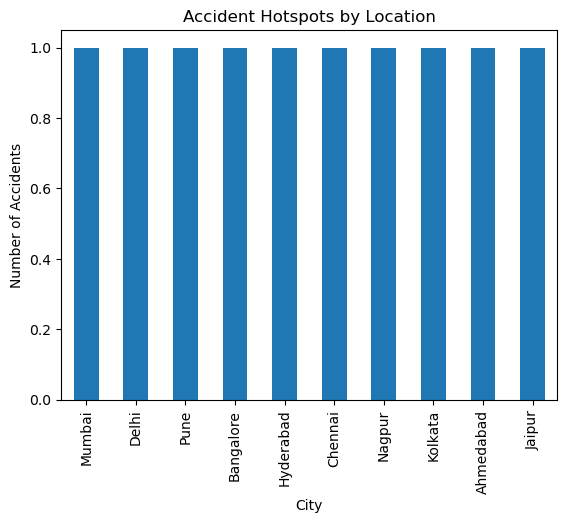

In [12]:
plt.figure()
location_count.plot(kind="bar")
plt.title("Accident Hotspots by Location")
plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.show()

In [13]:
severity_weather = pd.crosstab(df["Weather"], df["Severity"])
severity_weather

Severity,High,Low,Medium
Weather,,,
Clear,1,3,1
Foggy,2,0,0
Rainy,0,1,2


<Figure size 640x480 with 0 Axes>

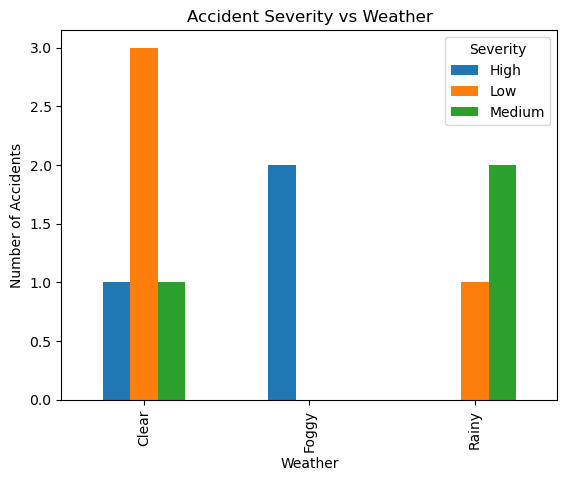

In [14]:
plt.figure()
severity_weather.plot(kind="bar")
plt.title("Accident Severity vs Weather")
plt.xlabel("Weather")
plt.ylabel("Number of Accidents")
plt.show()

In [15]:
df.to_csv("accident_analysis_processed.csv", index=False)